BASEBALL PROJECT

Problem Statement - This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.
Input Features - Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output Required - Predict Number of Wins in the new season

In [3]:
#Importing necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading data file
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [5]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#Checking random samples to understand data better
data.sample(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90


In [7]:
#Checking shape
data.shape

(30, 17)

In [9]:
#Checking data type and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [10]:
#Confirming for nulls
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no nulls in any of the columns and the data type is also integer for all features except ERA which has float data type.

In [12]:
#Checking more details about the data
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Initial Observations-

1. There are no null values for the features.
2. The standard deviation ranges from 2.76 to 103.75 which denotes that the distribution may not be in the same scale.
3. For SO, the difference between 75% and max is high which implies that there can be outliers and distribution may not be normal.
4.The distribution for the rest seems fine.

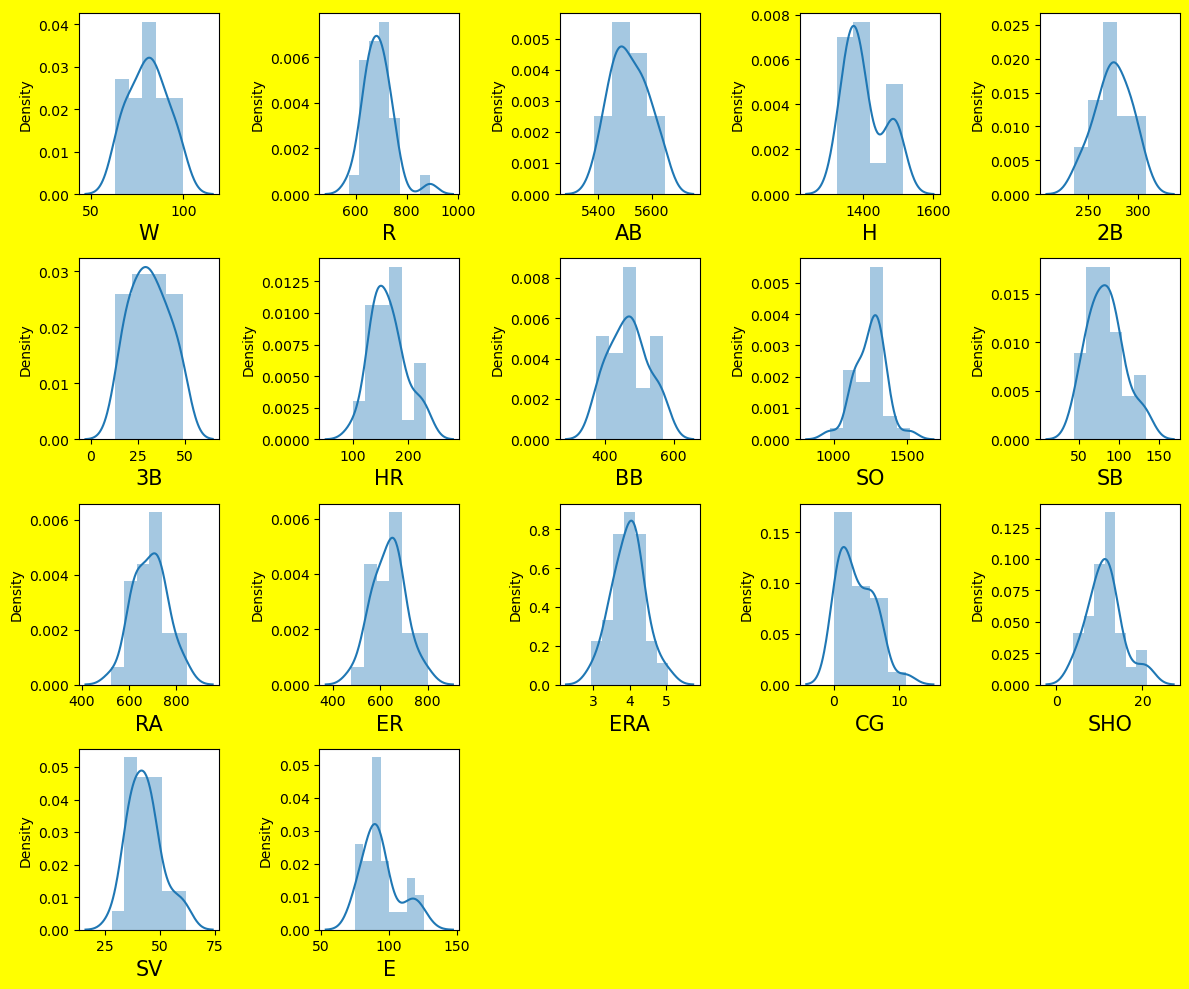

In [16]:
#let's find out more about the distribution through graphical representatioon
plt.figure(figsize=(12,10),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Distribution seems normal for most of the features except E, SV, SHO,R, CG and SO.

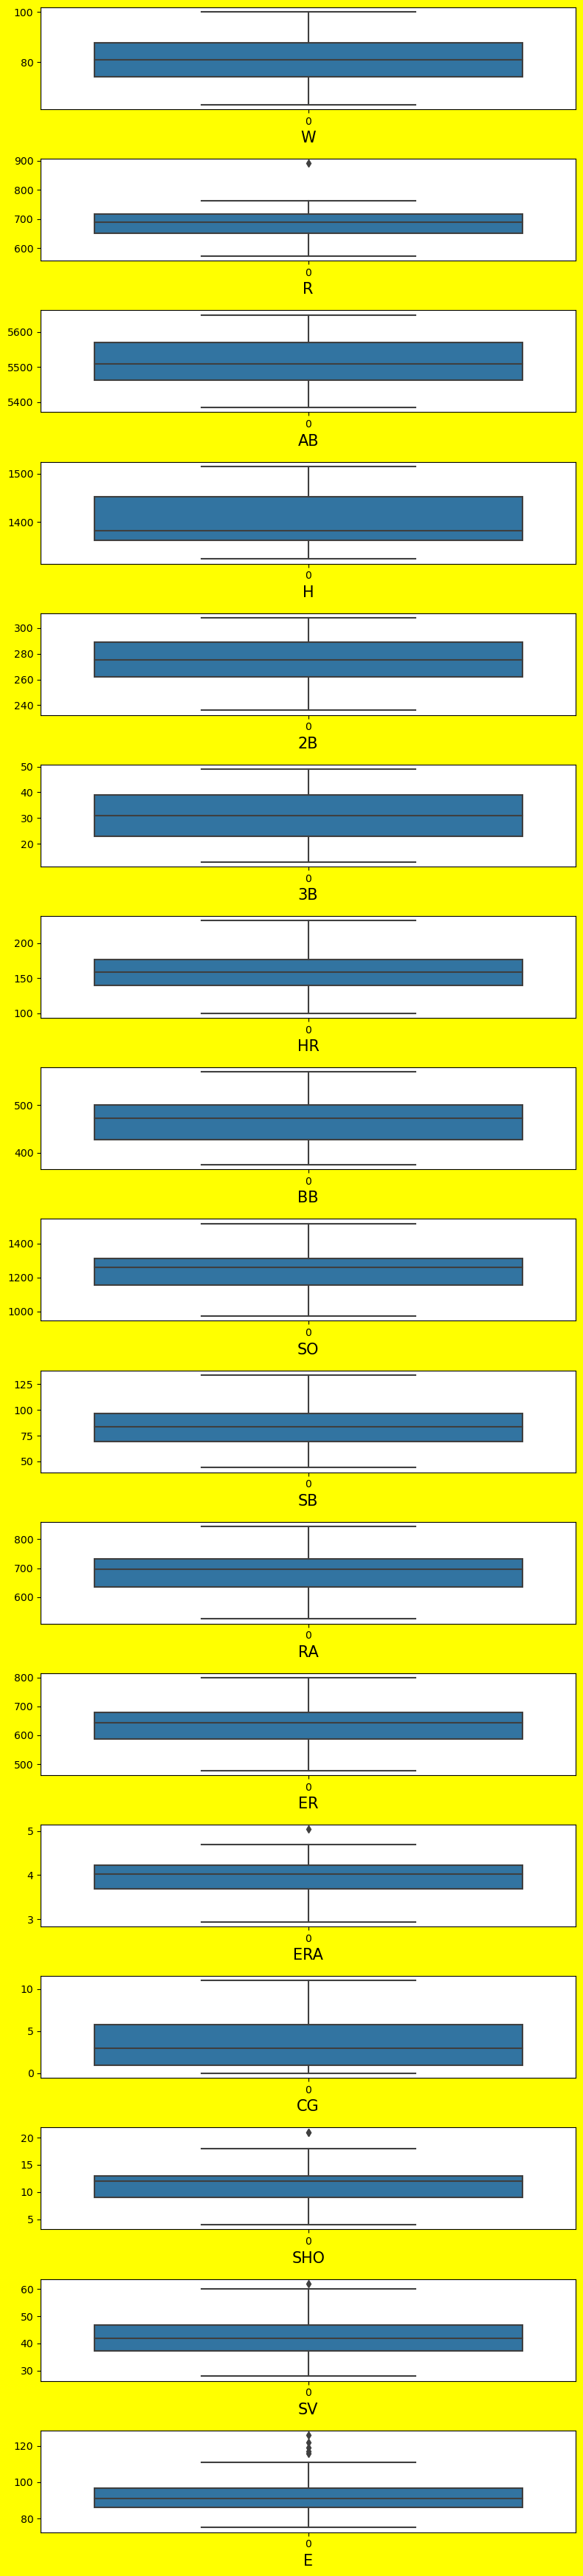

In [20]:
#Let's check for outliers
plt.figure(figsize=(8,35),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can see that R, ERA, SHO, SV and E have outliers in the higher side. However, considering the real life scenario, R=Runs, ERA=Earned Run Average, S=Save, SHO=Shoutout and Errors can have outliers as the scores in every match can vary so, we will not eliminate them.

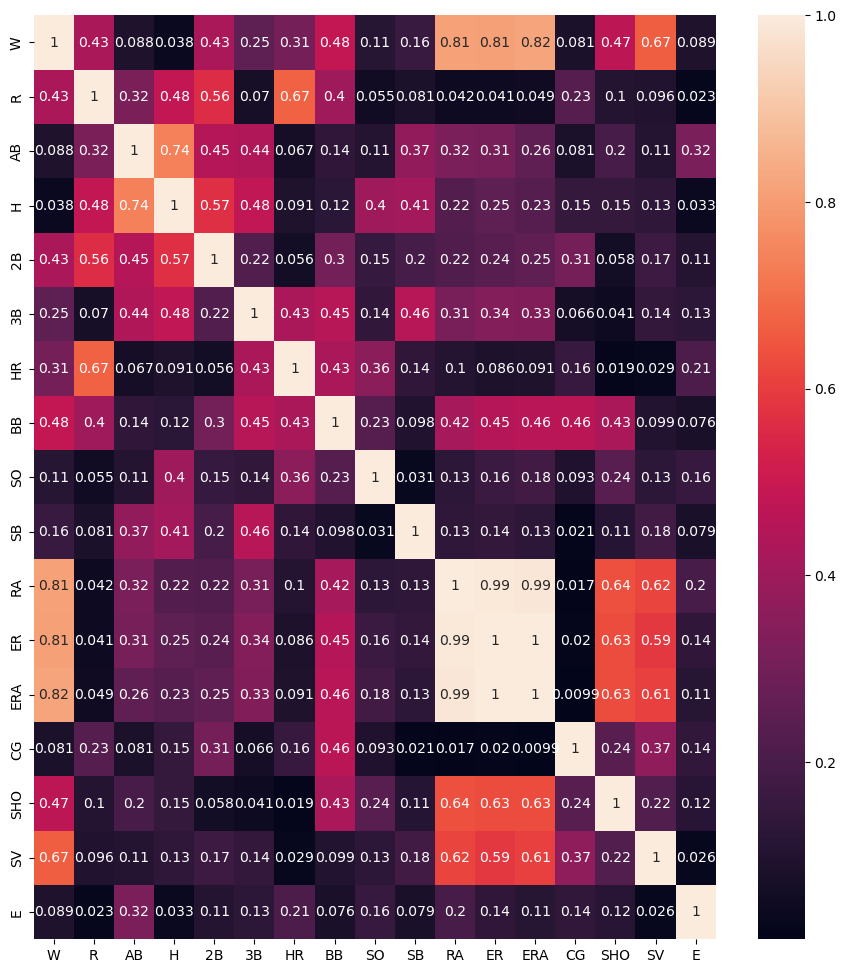

In [37]:
#Checking for relationship/correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(11,12))
sns.heatmap(data_corr,annot=True,annot_kws={'size':10})
plt.show()

Observation-
RA and ERA, RA and ER, ER and ERA, ER and RA are highly correlated features. However, we can see that ER, ERA and RA have a very good relation with the target W(Wins).

In [41]:
#Checking realtion of features with the target graphicallty to select the required features
data.drop('W',axis=1).corrwith(data.W)


R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

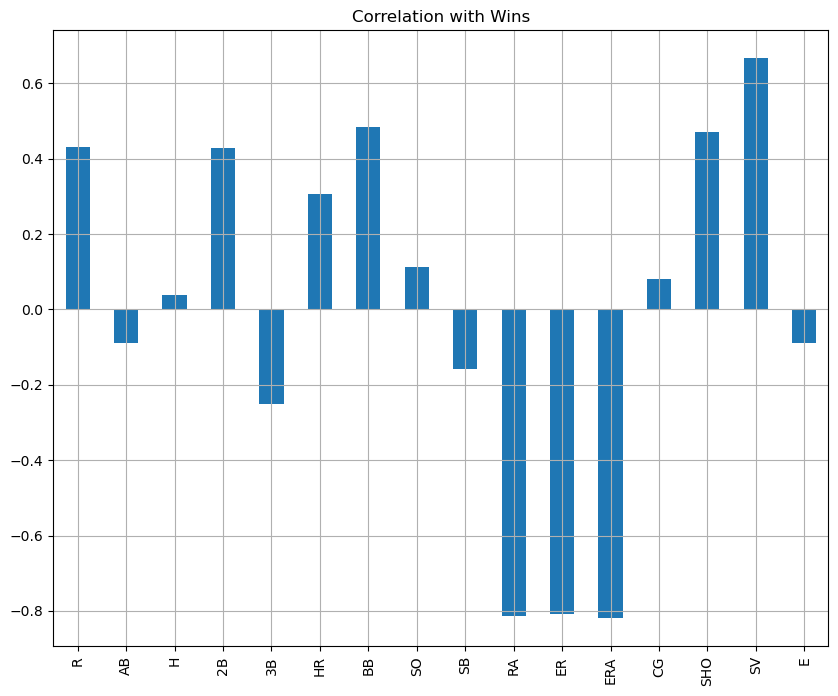

In [42]:
data.drop('W',axis=1).corrwith(data.W).plot(kind='bar',grid=True,figsize=(10,8),title="Correlation with Wins")
plt.show()

It is evident that H and AB has the least contribution to the target Wins so, it would be best if we drop these features. Also, among ER,RA and ERA, ER contributes the least in determining the target so, dropping this feature would be okay.

In [6]:
data.drop(columns=['H','ER', 'AB'],axis=1, inplace=True)

In [7]:
data.head()

,W,R,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,289,49,151,455,1259,83,803,4.64,7,12,35,86


In [8]:
#Separating Features and label-
X=data.drop(columns=['W'],axis=1)
y=data['W']

In [133]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [9]:
#Let's check the skewness
X.skew()


R      1.200786
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

R and E seems positively skewed, let's fix this


In [10]:
X['R']=np.log(X['R'])
X['E']=np.log(X['E'])


In [11]:
X.skew()

R      0.744196
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.630080
dtype: float64

The skewness has been fixed now



In [12]:
#Data transformation
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [14]:
X_scaled

array([[ 0.66538462,  1.42017307,  1.04119304, -0.7872986 , -1.53490242,
        -2.69762957,  0.91388329, -0.66623393, -0.50695519, -0.5398062 ,
        -0.81462859,  1.67160651, -0.42662861],
       [ 0.17962404,  0.12740339,  1.23580856, -0.24396668, -0.5365919 ,
         0.15487844, -0.60182558,  0.16597077,  0.25459752, -0.5398062 ,
         0.1728    ,  0.24987932, -0.59144836],
       [-0.30766209,  1.58879521, -0.22380785, -0.7233772 ,  1.13914361,
        -0.89398189,  0.11144918, -0.68033909, -0.64134684,  2.77264091,
        -0.32091429, -0.65485616, -1.20012163],
       [-1.20480139, -0.82812203, -0.41842337, -0.8831807 , -1.16053598,
        -0.16860185, -0.69098493,  0.18007593,  0.05301004,  1.3004422 ,
        -0.56777144, -0.78410408,  0.56119008],
       [ 0.05513009,  0.80189192,  1.72234737, -0.40377019, -0.25136033,
         0.10586628, -0.02228984,  1.61880269,  1.53131824,  1.3004422 ,
         0.1728    , -1.04259994, -0.59144836],
       [ 3.22158785,  1.869832

In [15]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.25,random_state=55)

In [17]:
y_train

0      95
17     97
20     90
28     74
21     83
24     63
22     71
27     79
15    100
12     85
29     68
14     68
3      76
16     98
1      83
25     92
23     67
5      93
8      80
7      81
26     84
13     76
Name: W, dtype: int64

In [18]:
#Model training
#Using Linear Regression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [19]:
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [20]:
pred_train=regression.predict(X_train)
pred_test=regression.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train)}")
print(f" testing accuracy is {r2_score(y_test,pred_test)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test)
print("Mean Absolute Error Score:",mean_score)


 training accuracy is 0.9488430990810612
 testing accuracy is 0.8737001975719613
Mean Absolute Error Score: 2.683953579538561


In [22]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [23]:
for k in range(3,6):
    cv_score=cross_val_score(regression,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.4237903933828672


 at 4, cross val score is 0.7397232530082481


 at 5, cross val score is 0.5570521912131154




In [148]:
#Using Support Vector Regressor
from sklearn.svm import SVR


In [149]:
sv=SVR()
sv.fit(X_train,y_train)


SVR()

In [150]:
pred_train1=sv.predict(X_train)
pred_test1=sv.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train1)}")
print(f" testing accuracy is {r2_score(y_test,pred_test1)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test1)
print("Mean Absolute Error Score:",mean_score)


 training accuracy is 0.2395883315621785
 testing accuracy is 0.0879054097728087
Mean Absolute Error Score: 6.703865827727835


In [151]:
for k in range(3,6):
    cv_score=cross_val_score(sv,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is -0.11858342555658252


 at 4, cross val score is -0.24593085322096292


 at 5, cross val score is -0.4496300971176364




In [152]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [153]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [154]:
pred_train2=rfr.predict(X_train)
pred_test2=rfr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train2)}")
print(f" testing accuracy is {r2_score(y_test,pred_test2)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test2)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.9378242861003513
 testing accuracy is 0.3942861184792221
Mean Absolute Error Score: 5.749999999999998


In [155]:
for k in range(3,6):
    cv_score=cross_val_score(sv,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is -0.11858342555658252


 at 4, cross val score is -0.24593085322096292


 at 5, cross val score is -0.4496300971176364




In [156]:
#Using Ridge
from sklearn.linear_model import Ridge,RidgeCV

In [157]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [158]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.001))


In [159]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]))

In [160]:
ridgecv.alpha_

0.099

In [161]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.099)

In [162]:
pred_train3=ridge_model.predict(X_train)
pred_test3=ridge_model.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train3)}")
print(f" testing accuracy is {r2_score(y_test,pred_test3)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test3)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.9468500670241202
 testing accuracy is 0.8989212599502483
Mean Absolute Error Score: 2.16573667767054


In [163]:
for k in range(3,6):
    cv_score=cross_val_score(ridge_model,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.3578338261731548


 at 4, cross val score is 0.6460067687093819


 at 5, cross val score is 0.03989673129444924




In [164]:
#Using K-Neighbours Regressor
from sklearn.neighbors import KNeighborsRegressor

In [165]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [166]:
pred_train4=knn.predict(X_train)
pred_test4=knn.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train4)}")
print(f" testing accuracy is {r2_score(y_test,pred_test4)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test4)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.6773148365012162
 testing accuracy is 0.5021750663129974
Mean Absolute Error Score: 4.450000000000001


In [167]:
for k in range(3,6):
    cv_score=cross_val_score(ridge_model,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.3578338261731548


 at 4, cross val score is 0.6460067687093819


 at 5, cross val score is 0.03989673129444924




In [172]:
final_data = pd.DataFrame({'Models':['LR','SVR','RFR','RIDGE','KNN'],
             'R2_SCORE':[r2_score(y_test,pred_test)*100,
                   r2_score(y_test,pred_test1)*100,
                   r2_score(y_test,pred_test2)*100,
                   r2_score(y_test,pred_test3)*100,
                   r2_score(y_test,pred_test4)*100]})

In [173]:
final_data

,Models,R2_SCORE
0,LR,87.370020
1,SVR,8.790541
2,RFR,39.428612
3,RIDGE,89.892126
4,KNN,50.217507


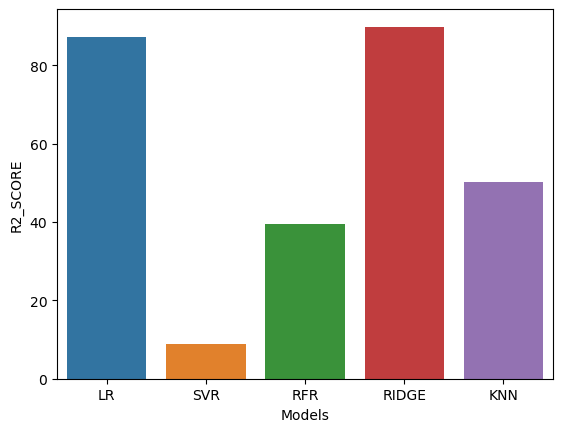

In [174]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data)
plt.show()

We can conclude that Linear Regression model is the best model as it works great on test data and Mean absolute score is the lowest.
At CV 4, we are getting 73% accuracy when actual test score is 87% and MAE is 2.3.
We can see that Ridge model also gives a great r2 score of 89% but the cv score is much lower which proves that model is overfitted.
Hence, Linear Regression model seems to be the best model and we will move ahead with this.

In [24]:
#Let's use hyperperameter tuning technique to stabilize model and to generalize it for unseen data.
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid={'n_jobs': [3,4,5,10]}

In [26]:
gridsearch=GridSearchCV(estimator=regression, param_grid=param_grid, cv=4)

In [27]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'n_jobs': [3, 4, 5, 10]})

In [28]:
gridsearch.best_params_

{'n_jobs': 3}

In [29]:
Final_model=LinearRegression(n_jobs= 3)

In [30]:
Final_model.fit(X_train,y_train)

LinearRegression(n_jobs=3)

In [31]:
pred=Final_model.predict(X_test)

In [32]:
r2_scr=r2_score(y_test,pred_test)
print(r2_scr*100)

87.37001975719613


In [36]:
y_pred = regression.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'Reg predicted': y_pred})

In [37]:
data1

,Actual,Reg predicted
4,74,69.977544
11,86,80.963411
19,64,61.763003
2,81,79.045257
18,68,69.355560
10,88,84.613181
6,87,86.180560
9,78,80.659025


In [41]:
#saving and loading data
import joblib

In [44]:
joblib.dump(Final_model,"baseball")

['baseball']

In [45]:
model = joblib.load("baseball")